In [1]:
import pickle
#with open("2_0_0_analysisdata/2_0_0mpi_run_results30.pkl","rb")as f:
with open("2_0_0_analysisdata/2_0_0mpi_run_results30_005to0.pkl","rb")as f:
    results = pickle.load(f)
size=30

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
%%time
arr = np.asarray([r[0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_params = np.asarray([r[1] for r in results ]).reshape( int(len(results)**0.5),-1,4)
arr_thres1 = np.asarray([r[1][0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_thres2 = np.asarray([r[1][1] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol1 = np.asarray([r[1][2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol2 = np.asarray([r[1][3] for r in results ]).reshape( int(len(results)**0.5),-1) 

CPU times: total: 953 ms
Wall time: 1.06 s


Text(0.5, 0, 'threshold2')

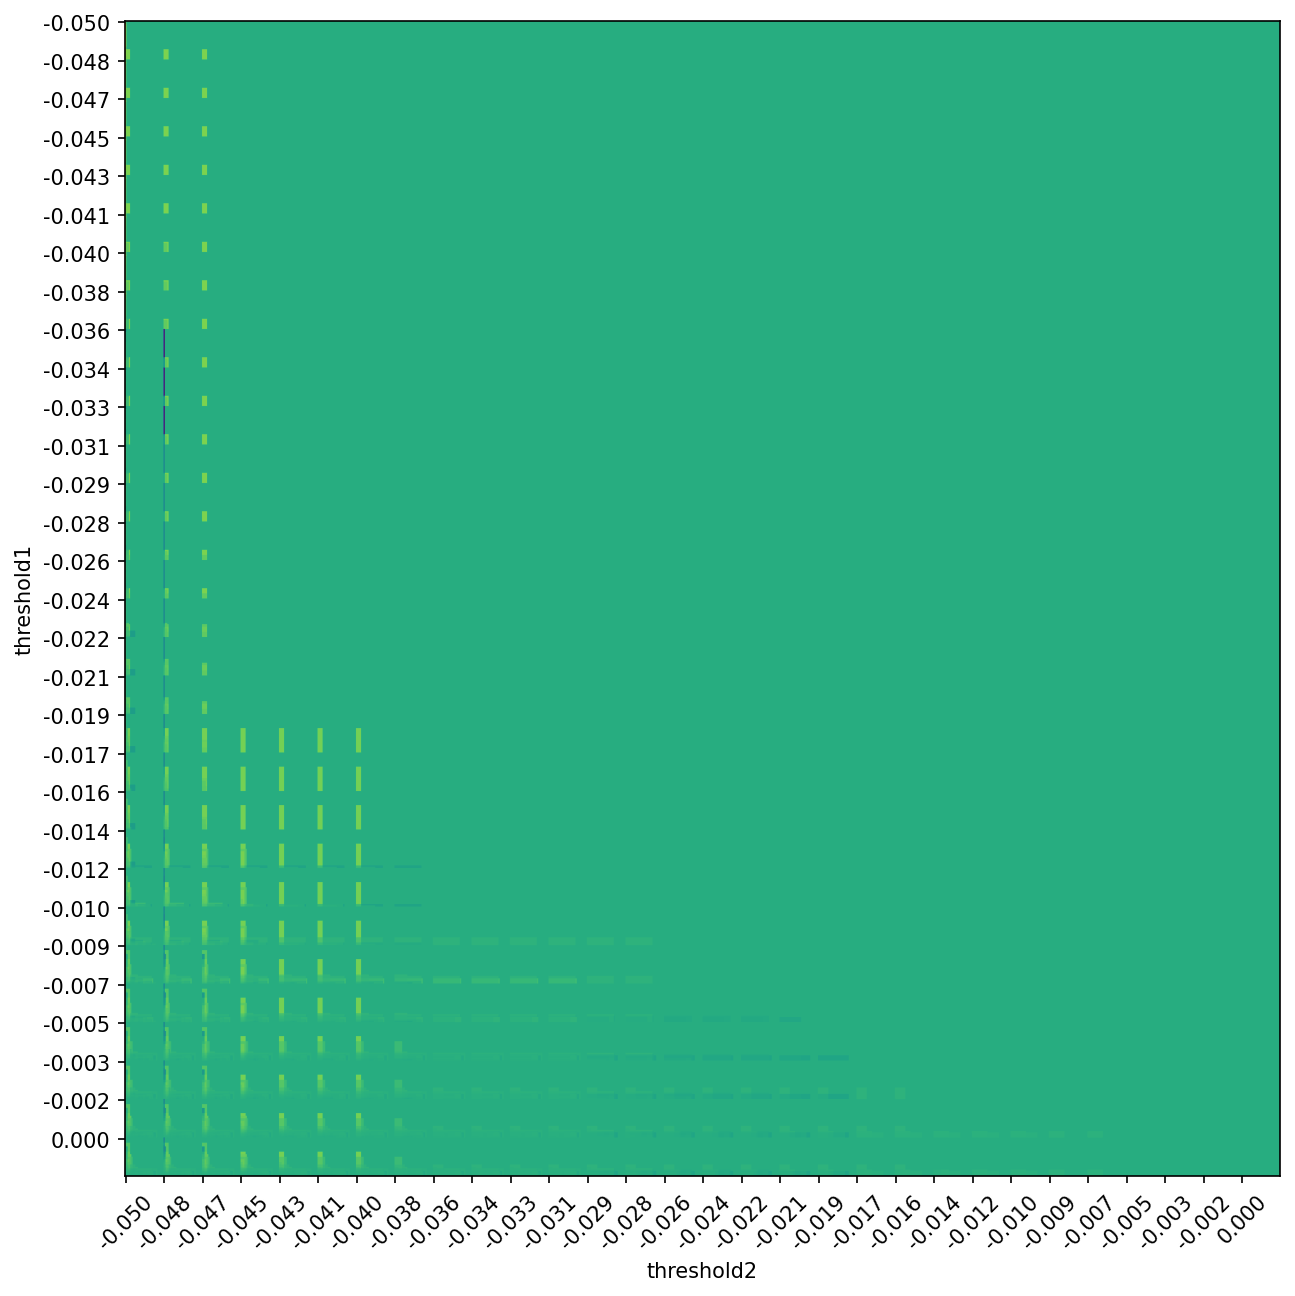

In [4]:
fig,ax=plt.subplots(dpi=150,figsize=(10,10))
ax.imshow(arr,interpolation=None)
ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,0].reshape(-1)))
ax.set_yticklabels([f"{y:.3f}" for y in yvals]);
ax.set_ylabel("threshold1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,1].reshape(-1)))
ax.set_xticklabels([f"{x:.3f}" for x in xvals],rotation=45);
ax.set_xlabel("threshold2")

In [5]:
%%time
size=30
arr_params = np.asarray([r[1] for r in results ]).reshape( size,size,size,size,4)
arr_params2 = np.transpose(arr_params,axes=(2,3,0,1,-1))
#arr_params = np.asarray([r[1] for r in results ]).reshape( int(len(results)**0.5),-1,4)

CPU times: total: 375 ms
Wall time: 443 ms


In [6]:
arr_params.shape,arr_params2.shape

((30, 30, 30, 30, 4), (30, 30, 30, 30, 4))

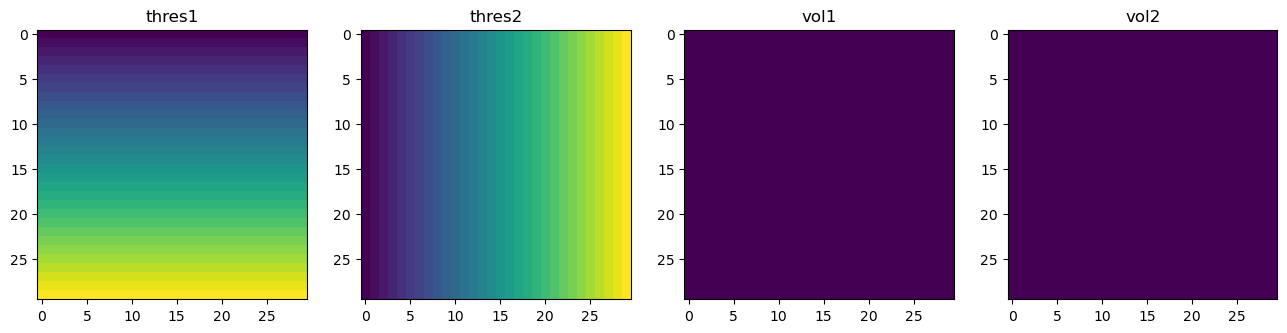

In [7]:
fig,axx=plt.subplots(1,4,figsize=(16,4))
#ax=axx[0]
for  i,(ax,title) in enumerate(zip(axx,["thres1","thres2","vol1","vol2"])):
    ax.imshow(arr_params2[2,15,:,:,i])
    ax.set_title(title)

In [8]:
%%time
arr = np.asarray([r[0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol =np.asarray([r[0] for r in results ]).reshape( size,size,size,size)
arr_vol = np.transpose(arr_vol,axes=(2,3,0,1))
arr_vol = arr_vol.reshape(size**2,size**2)

CPU times: total: 234 ms
Wall time: 271 ms


CPU times: total: 500 ms
Wall time: 540 ms


Text(0.5, 0, 'volume2')

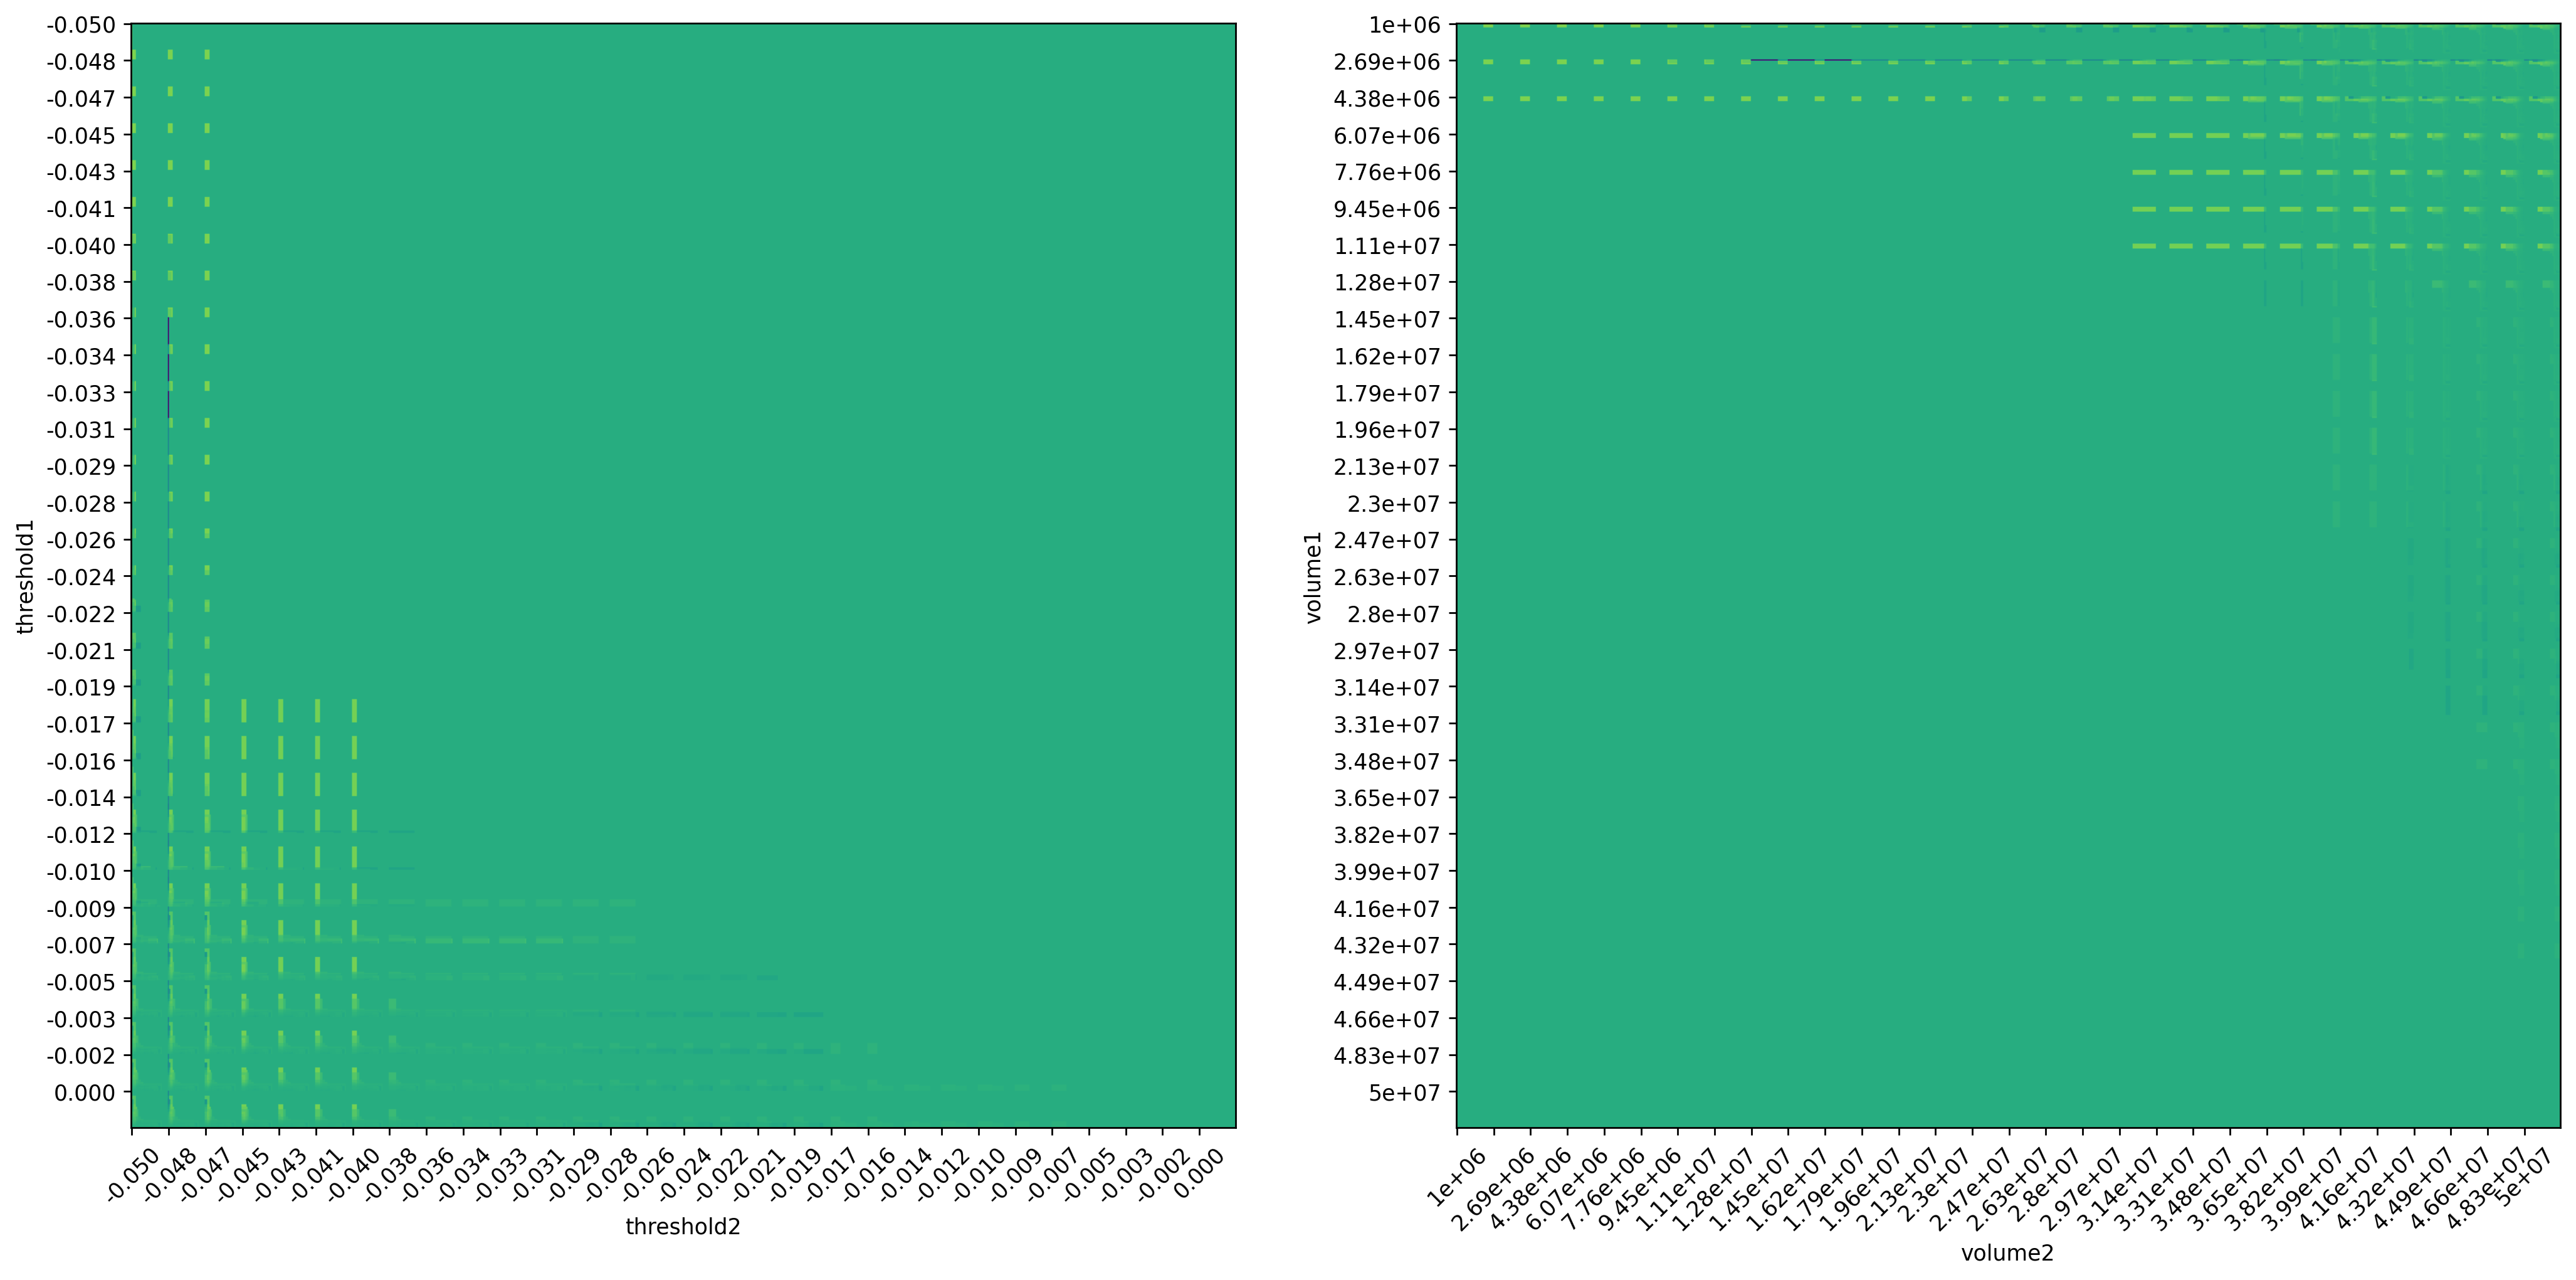

In [9]:
%%time
fig,axx=plt.subplots(1,2,dpi=250,figsize=(20,10))
ax=axx[0]
ax.imshow(arr,interpolation=None)
#ax.set_xlabel("change")

ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,:,:,0].reshape(-1)))
ax.set_yticklabels([f"{y:.3f}" for y in yvals]);
ax.set_ylabel("threshold1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,:,:,1].reshape(-1)))
ax.set_xticklabels([f"{x:.3f}" for x in xvals],rotation=45);
ax.set_xlabel("threshold2")

ax=axx[1]
ax.imshow(arr_vol,interpolation=None)
#ax.set_xlabel("volume")

ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,:,:,2].reshape(-1)))
ax.set_yticklabels([f"{y:.3g}" for y in yvals]);
ax.set_ylabel("volume1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,:,:,3].reshape(-1)))
ax.set_xticklabels([f"{x:.3g}" for x in xvals],rotation=45);
ax.set_xlabel("volume2")


In [10]:
arr_num_trades = np.asarray([r[2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_std = np.asarray([np.std(r[3]) if r[3] else -99 for r in results ]).reshape( int(len(results)**0.5),-1)

In [11]:
row,col = np.where((arr>0.0041)& (arr<0.5)&(arr_num_trades>30)&(arr_num_trades<100))
row,col = np.where((arr>0.0041)& (arr>arr_std-0.0051)&(arr_num_trades>30)&(arr_num_trades<100))
#row,col = np.where(arr==0.016196886832141322)
result_locs = row*900+col
"num of params",len(result_locs),"trading period",55000/60/24,"days"

('num of params', 18, 'trading period', 38.19444444444444, 'days')

In [12]:
def get_winpercent(profits):
    return len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
order = np.argsort([np.std(results[r_loc][3]) for r_loc in result_locs])
order = np.argsort([-get_winpercent(results[r_loc][3]) for r_loc in result_locs])

for r_loc in result_locs[order]:
    print(results[r_loc][:3])
    profits=results[r_loc][3]
    winpercent=len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
    print(np.std(results[r_loc][3]),r_loc,winpercent)

(0.0047807405985210135, (-0.006896551724137931, -0.00862068965517241, 1000000.0, 2689655.1724137934), 32)
0.008362143397107365 696601 0.75
(0.005101609875356313, (-0.00862068965517241, -0.0017241379310344793, 1000000.0, 4379310.344827587), 34)
0.006575222073712926 673202 0.7352941176470589
(0.004399649752085526, (-0.00862068965517241, -0.0017241379310344793, 2689655.1724137934, 2689655.1724137934), 34)
0.007901081917477277 673231 0.7352941176470589
(0.005221165444285478, (-0.012068965517241376, -0.0017241379310344793, 1000000.0, 2689655.1724137934), 33)
0.006634064311929983 619201 0.7272727272727273
(0.005256525355261665, (-0.006896551724137931, -0.0017241379310344793, 2689655.1724137934, 4379310.344827587), 32)
0.005870046957301924 700232 0.71875
(0.004285265704094483, (-0.005172413793103445, -0.006896551724137931, 2689655.1724137934, 2689655.1724137934), 32)
0.008037629225144545 724531 0.71875
(0.00417464117800796, (-0.006896551724137931, -0.005172413793103445, 2689655.1724137934, 26

# low volume then high volume, -0% then -5%

# what are the win% of these? what are the number of trades?

In [13]:
from plotting import plot_profits

params -0.00689655,-0.00862069,1000000.00000000,2689655.17241379


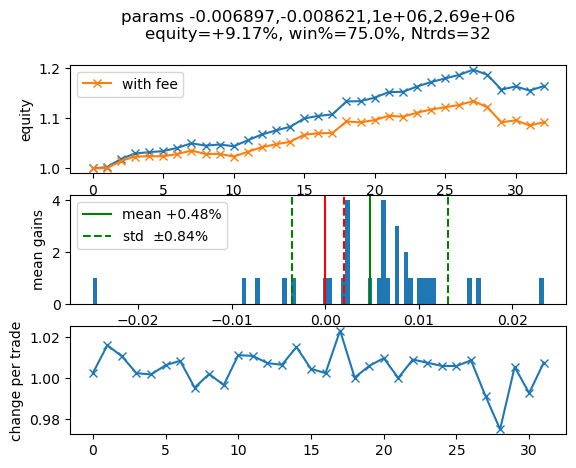

params -0.00862069,-0.00172414,1000000.00000000,4379310.34482759


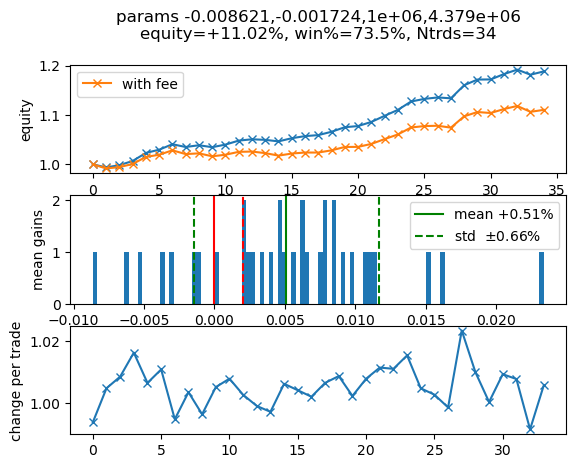

params -0.00862069,-0.00172414,2689655.17241379,2689655.17241379


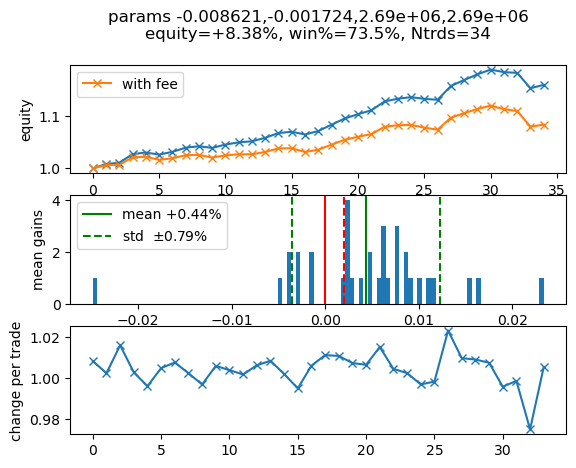

In [14]:
for r_loc in result_locs[order][:3]:
    print("params",",".join([f"{r:.8f}" for r in results[r_loc][1]]))
    profits = results[r_loc][3]#779432 #805532 
    plot_profits(profits,title="params "+",".join([f"{r:.4g}" for r in results[r_loc][1]]))

# for the each param, find the times of the trades

In [15]:
with open("2_0_0_analysisdata/2_0_0dfmpl_list.pkl","rb")as f:
    dfmpl_list = pickle.load(f)

In [16]:
dfmpl_list[:2]

[(                       Open    High     Low   Close    Volume
  Date                                                         
  2023-03-31 10:49:00  0.1092  0.1093  0.1091  0.1093   72053.0
  2023-03-31 10:50:00  0.1092  0.1092  0.1089  0.1090   33803.0
  2023-03-31 10:51:00  0.1090  0.1092  0.1089  0.1089  186608.0
  2023-03-31 10:52:00  0.1089  0.1091  0.1089  0.1091  266905.0
  2023-03-31 10:53:00  0.1090  0.1092  0.1090  0.1090   91874.0
  ...                     ...     ...     ...     ...       ...
  2023-05-08 15:24:00  0.0898  0.0899  0.0898  0.0899   17013.0
  2023-05-08 15:25:00  0.0899  0.0899  0.0898  0.0898    6547.0
  2023-05-08 15:26:00  0.0899  0.0899  0.0899  0.0899     886.0
  2023-05-08 15:27:00  0.0899  0.0899  0.0899  0.0899    1750.0
  2023-05-08 15:28:00  0.0899  0.0899  0.0899  0.0899       0.0
  
  [55000 rows x 5 columns],
  'XLMUSDT',
  3),
 (                       Open    High     Low   Close     Volume
  Date                                               

In [17]:
def validate_df(loc, df_v, v0_thres, v1_thres):
    v0 = df_v[loc, 0] * df_v[loc, 4]
    v1 = df_v[loc + 1, 0] * df_v[loc + 1, 4]
    return v0 > v0_thres and v1 > v1_thres
def objective(params):
    threshold1, threshold2, v0_thres, v1_thres = params
    collated_data_list = []

    for dfmpl, _, _ in dfmpl_list:
        df_v = dfmpl.values
        changes = (df_v[:, 3] - df_v[:, 0]) / df_v[:, 0]
        a4_1 = np.logical_and(changes[1:] < threshold1, changes[:-1] < threshold2)
        locs = np.where(a4_1)[0]
        if locs.size > 0:
            chosen_locs = [loc for loc in locs if validate_df(loc, df_v, v0_thres, v1_thres)]
            if chosen_locs:
                collated_data = np.asarray([changes[loc:loc + 5] for loc in chosen_locs])
                collated_data_list.append(collated_data)

    collated_data = np.vstack(collated_data_list)
    mean_val = collated_data[:, 2].mean()
    return mean_val, params



In [18]:
%%time
top_params_to_use=3
all_trade_locs = [] 
for r_loc in result_locs[order][:top_params_to_use]:
    threshold1, threshold2, v0_thres, v1_thres = results[r_loc][1]
    collated_data_list = []
    trade_locs=[]
    for dfmpl, symb, _ in dfmpl_list:
        df_v = dfmpl.values
        changes = (df_v[:, 3] - df_v[:, 0]) / df_v[:, 0]
        a4_1 = np.logical_and(changes[1:] < threshold1, changes[:-1] < threshold2)
        locs = np.where(a4_1)[0]
        if locs.size > 0:
            chosen_locs = [loc for loc in locs if validate_df(loc, df_v, v0_thres, v1_thres)]
            if chosen_locs:
                [trade_locs.append((loc,symb)) for loc in chosen_locs]
                collated_data = np.asarray([changes[loc:loc + 5] for loc in chosen_locs])
                collated_data_list.append(collated_data)

    collated_data = np.vstack(collated_data_list)
    mean_val = collated_data[:, 2].mean()
    all_trade_locs.append(trade_locs)

CPU times: total: 141 ms
Wall time: 164 ms


In [19]:
mean_val,len(collated_data),len(trade_locs)

(0.004399649752085526, 34, 34)

In [20]:
from collections import Counter
len(set([t for trade_locs in all_trade_locs for t,_ in trade_locs ]))

53

In [45]:
all_trade_locs = []
profits=[]
trade_loc_list=[]
df_list = []
for r_loc in result_locs[order][:top_params_to_use]:
    threshold1, threshold2, v0_thres, v1_thres = results[r_loc][1] 
    collated_data_list = []
    collected_dfs = []
    trade_locs=[]
    for dfmpl, symb, _ in dfmpl_list:
        df_v = dfmpl.values
        changes = (df_v[:, 3] - df_v[:, 0]) / df_v[:, 0] #open high low close volume
        
        a4_1 = np.logical_and(changes[1:] < threshold1, changes[:-1] < threshold2)
        locs = np.where(a4_1)[0]
        if locs.size > 0:
            chosen_locs = [loc for loc in locs if validate_df(loc, df_v, v0_thres, v1_thres)]
            if chosen_locs:
                [trade_locs.append(f"{loc}_{symb}") for loc in chosen_locs]
                collated_data = np.asarray([changes[loc:loc + 5] for loc in chosen_locs])
                collated_data_list.append(collated_data)
                collected_dfs.append(( [df_v[loc:loc + 5] for loc in chosen_locs] ))

    collated_data = np.vstack(collated_data_list)
    collected_dfs=[d for df in collected_dfs for d in df]
    mean_val = collated_data[:, 2].mean()
    all_trade_locs.append(trade_locs)
    for tl,cd,df in zip(trade_locs,collated_data[:, 2],collected_dfs):
        if tl not in trade_loc_list:
            profits.append(cd)
            trade_loc_list.append(tl)
            df_list.append(df)

In [46]:
len(collated_data),len(collected_dfs),len(trade_loc_list),len(df_list)

(34, 34, 53, 53)

In [51]:
df_list[0][2] # this is the next candlestick
df_list[0][2][1] # this is the next candlestick high

0.511

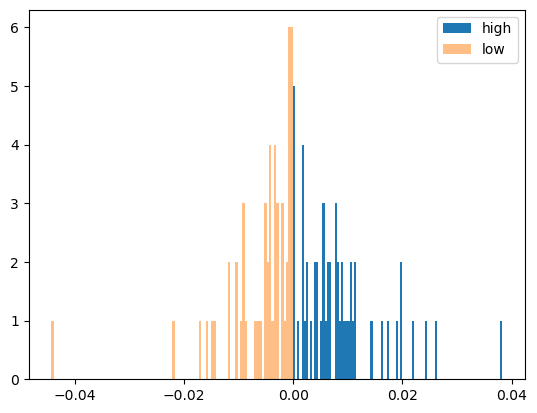

In [60]:
plt.hist([(df[2][1]-df[2][0])/df[2][0] for df in df_list],label="high",bins=100)
plt.hist([(df[2][2]-df[2][0])/df[2][0] for df in df_list],label="low",alpha=0.5,bins=100)
plt.legend()

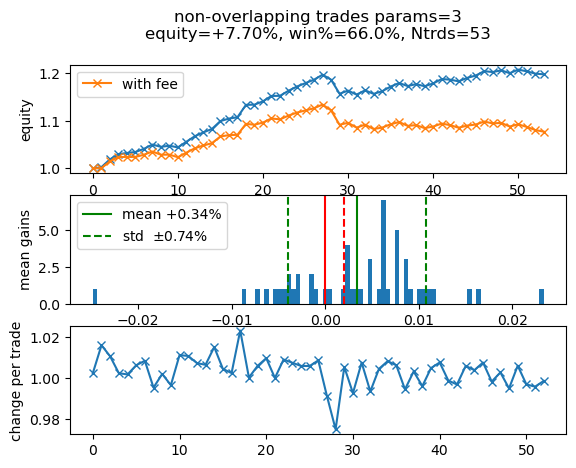

array([<Axes: title={'center': 'non-overlapping trades params=3\nequity=+7.70%, win%=66.0%, Ntrds=53\n'}, ylabel='equity'>,
       <Axes: ylabel='mean gains'>, <Axes: ylabel='change per trade'>],
      dtype=object)

In [71]:
plot_profits(profits,title=f"non-overlapping trades params={top_params_to_use}")

# obtain a few features, highP lowP gainP ampP vol 

In [61]:
highP=[(df[2][1]-df[2][0])/df[2][0] for df in df_list]
lowP =[(df[2][2]-df[2][0])/df[2][0] for df in df_list]
gainP=[(df[2][3]-df[2][0])/df[2][0] for df in df_list]
ampP =[(df[2][1]-df[2][2])/df[2][2] for df in df_list]
vol  =[df[2][0]*df[2][4] for df in df_list]

In [62]:
import pandas as pd

In [65]:
result_df = pd.DataFrame(data={"highP":highP,"lowP":lowP,"gainP":gainP,"ampP":ampP,"vol":vol})

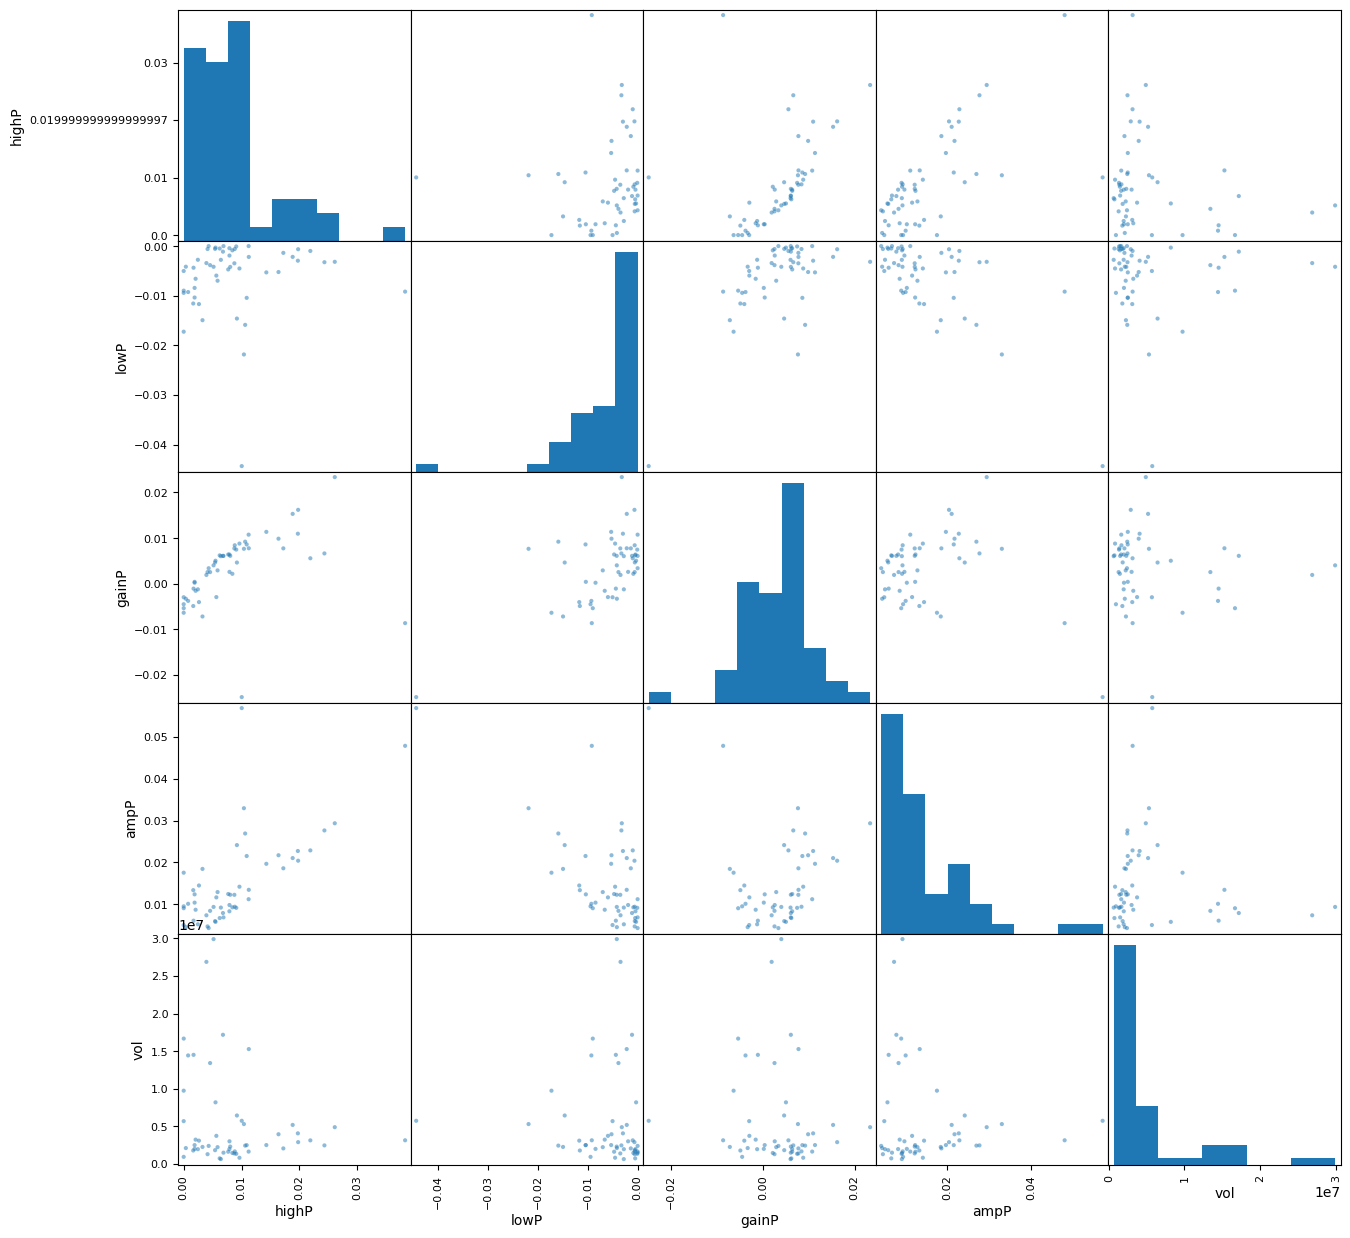

In [68]:
pd.plotting.scatter_matrix(result_df,figsize=(15,15));

# collecting features in 0 and 1 to predict 2

In [76]:
data=dict()
for col in [0,1,2]:
    highP=[(df[col][1]-df[col][0])/df[col][0] for df in df_list]
    lowP =[(df[col][2]-df[col][0])/df[col][0] for df in df_list]
    gainP=[(df[col][3]-df[col][0])/df[col][0] for df in df_list]
    ampP =[(df[col][1]-df[col][2])/df[col][2] for df in df_list]
    vol  =[df[col][0]*df[col][4] for df in df_list]
    data.update({f"highP{col}":highP,f"lowP{col}":lowP,f"gainP{col}":gainP,f"ampP{col}":ampP,f"vol{col}":vol})

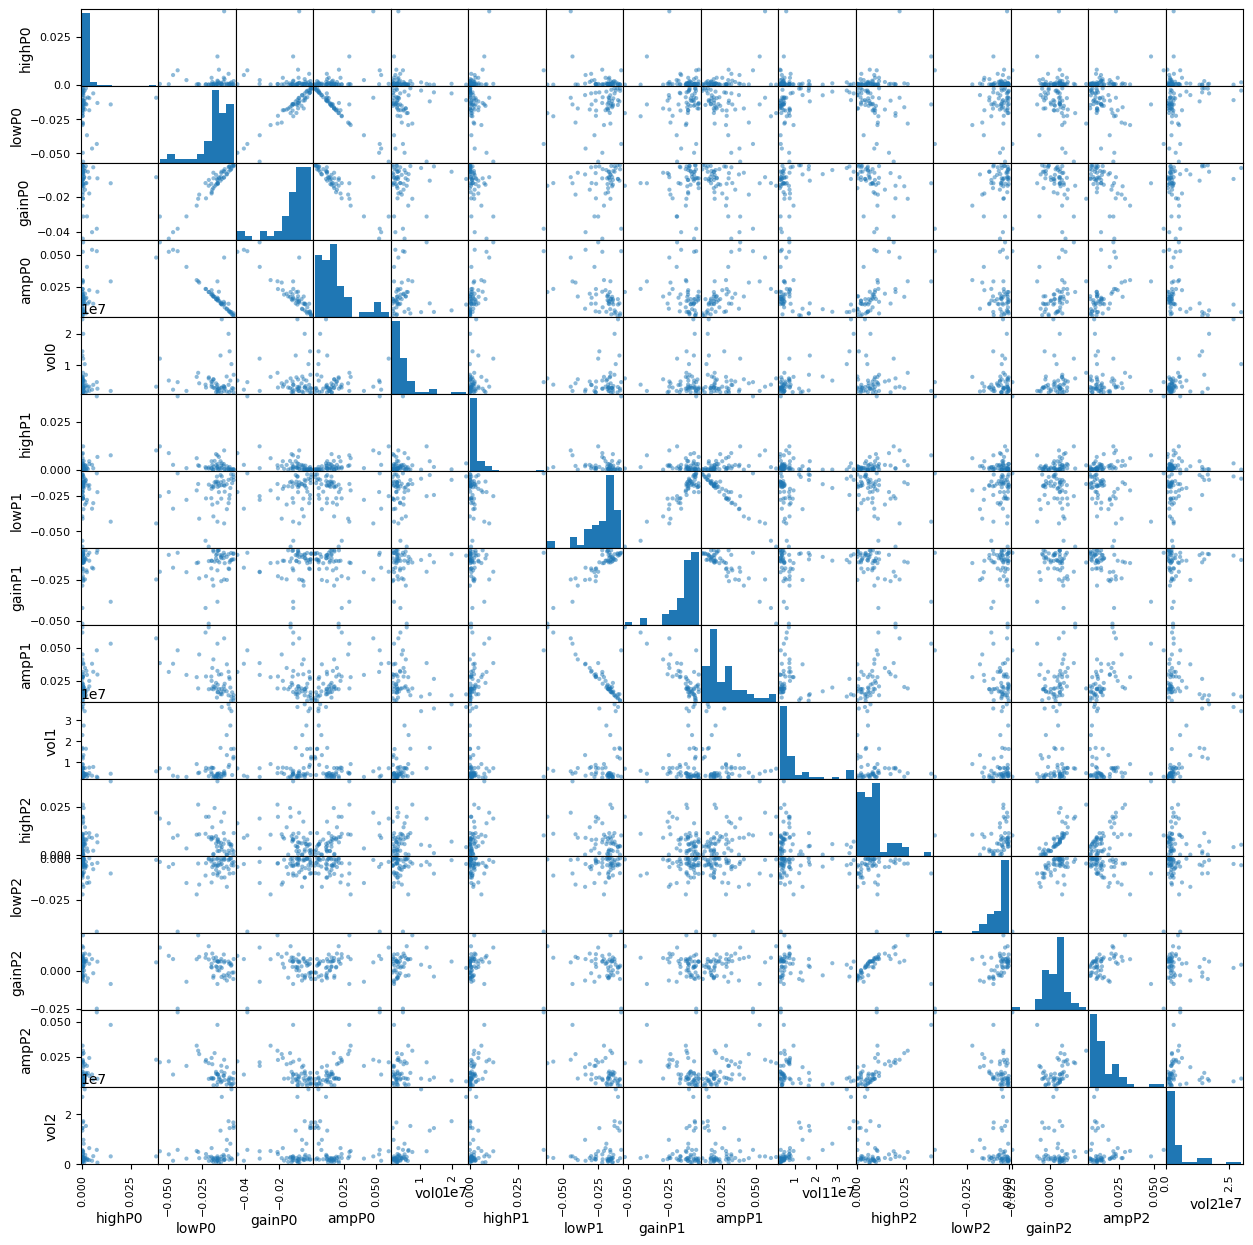

In [79]:
result_df = pd.DataFrame(data=data)
pd.plotting.scatter_matrix(result_df,figsize=(15,15));

# collecting more features by using a relaxed param

In [81]:
%%time
trade_loc_list=[]
df_list = [] 
threshold1, threshold2, v0_thres, v1_thres = -0.002,-0.002,1e6, 1e6
collated_data_list = []
collected_dfs = []
trade_locs=[]
for dfmpl, symb, _ in dfmpl_list:
    df_v = dfmpl.values
    changes = (df_v[:, 3] - df_v[:, 0]) / df_v[:, 0] #open high low close volume

    a4_1 = np.logical_and(changes[1:] < threshold1, changes[:-1] < threshold2)
    locs = np.where(a4_1)[0]
    if locs.size > 0:
        chosen_locs = [loc for loc in locs if validate_df(loc, df_v, 1e6, 1e6)]
        if chosen_locs:
            [trade_locs.append(f"{loc}_{symb}") for loc in chosen_locs]
            collated_data = np.asarray([changes[loc:loc + 5] for loc in chosen_locs])
            collated_data_list.append(collated_data)
            collected_dfs.append(( [df_v[loc:loc + 5] for loc in chosen_locs] ))

collated_data = np.vstack(collated_data_list)
collected_dfs=[d for df in collected_dfs for d in df]
mean_val = collated_data[:, 2].mean() 
for tl,cd,df in zip(trade_locs,collated_data[:, 2],collected_dfs):
    if tl not in trade_loc_list: 
        trade_loc_list.append(tl)
        df_list.append(df)

CPU times: total: 156 ms
Wall time: 191 ms


In [83]:
len(trade_loc_list),len(df_list)

(397, 397)

In [138]:
profits2 = [(df[2][3]-df[2][0])/df[2][0] for df in df_list]

In [144]:
np.argmin(np.arange(49).reshape(7,-1)//3,axis=1)

array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

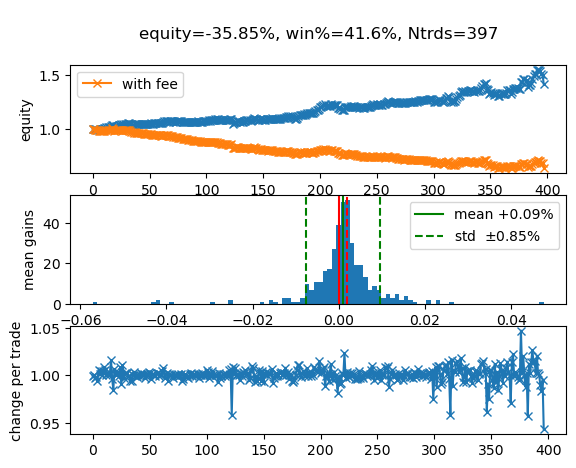

array([<Axes: title={'center': '\nequity=-35.85%, win%=41.6%, Ntrds=397\n'}, ylabel='equity'>,
       <Axes: ylabel='mean gains'>, <Axes: ylabel='change per trade'>],
      dtype=object)

In [140]:
plot_profits(profits2)

In [97]:
%%time
data=dict()
for col in [0,1,2]:
    highP=[(df[col][1]-df[col][0])/df[col][0] for df in df_list]
    lowP =[(df[col][2]-df[col][0])/df[col][0] for df in df_list]
    gainP=[(df[col][3]-df[col][0])/df[col][0] for df in df_list]
    ampP =[(df[col][1]-df[col][2])/df[col][2] for df in df_list]
    vol  =[df[col][0]*df[col][4] for df in df_list]
    data.update({f"highP{col}":highP,f"lowP{col}":lowP,f"gainP{col}":gainP,f"ampP{col}":ampP,f"vol{col}":vol})

CPU times: total: 0 ns
Wall time: 11 ms


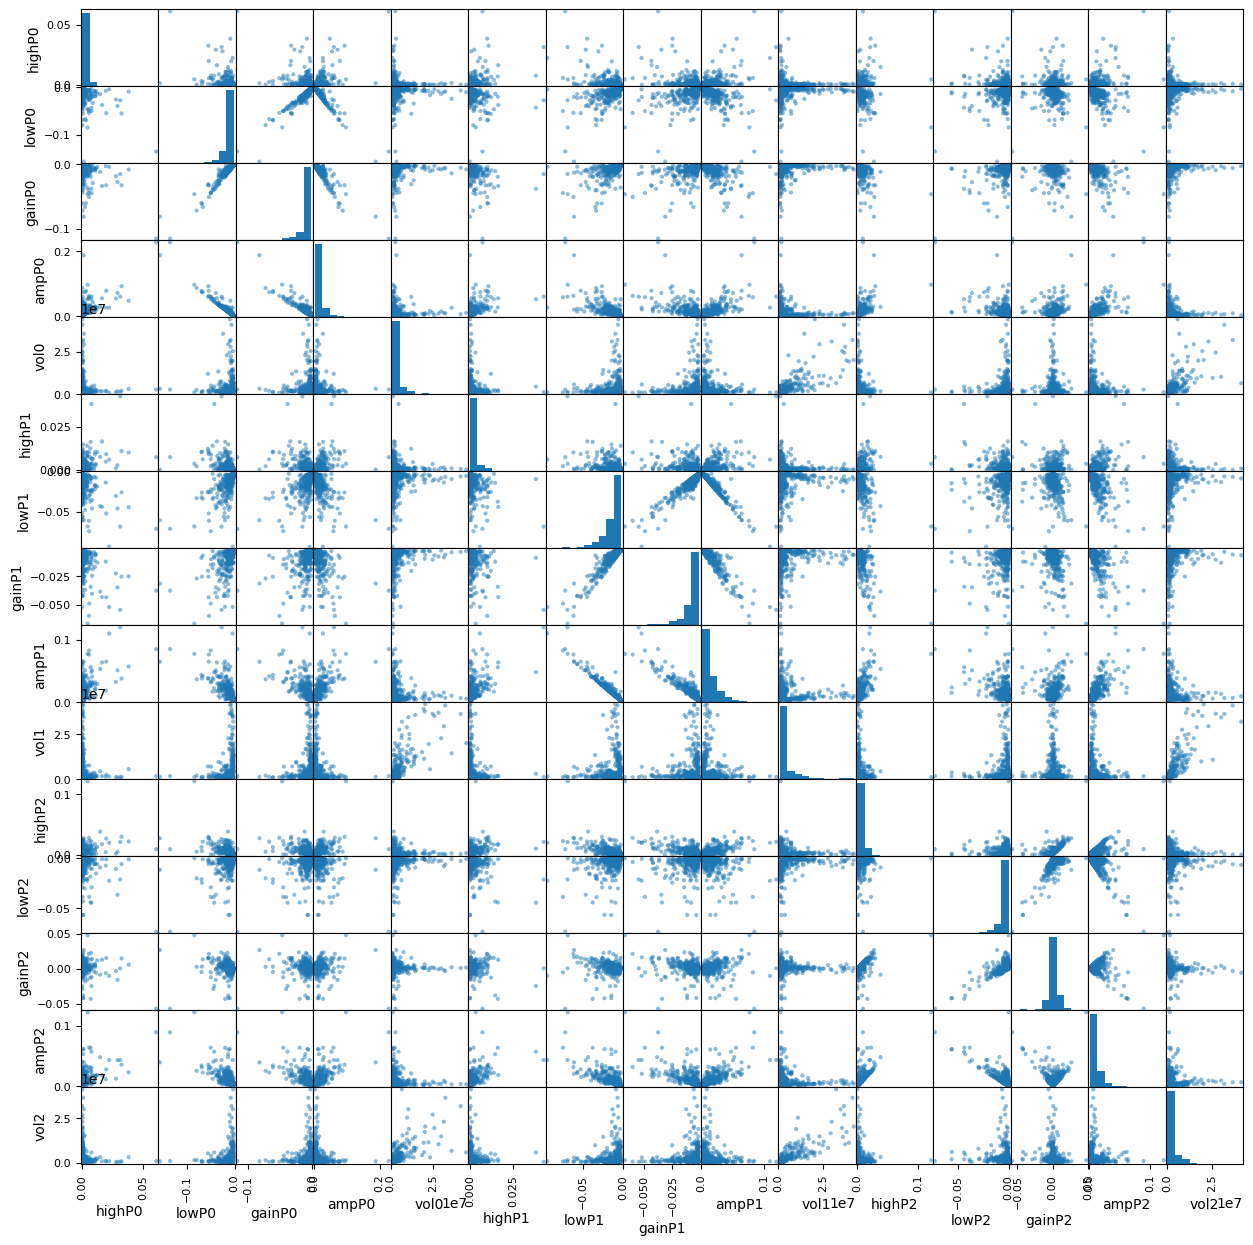

In [98]:
result_df = pd.DataFrame(data=data)
pd.plotting.scatter_matrix(result_df,figsize=(15,15));

In [118]:
xdata = result_df.iloc[:,:10].values
ydata = result_df.iloc[:,12].values
xdata.shape,ydata.shape

((397, 10), (397,))

In [103]:
import sklearn

In [104]:
import numpy as np

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

In [111]:
X.shape,Y.shape

((100, 30), (100, 40))

In [105]:
from sklearn.linear_model import Lasso, MultiTaskLasso

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_

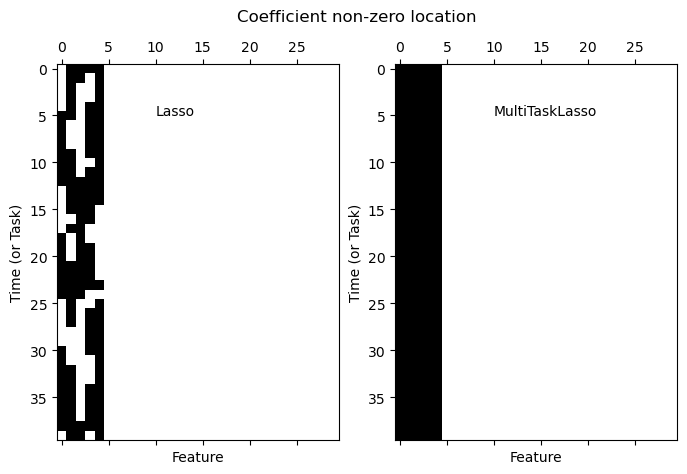

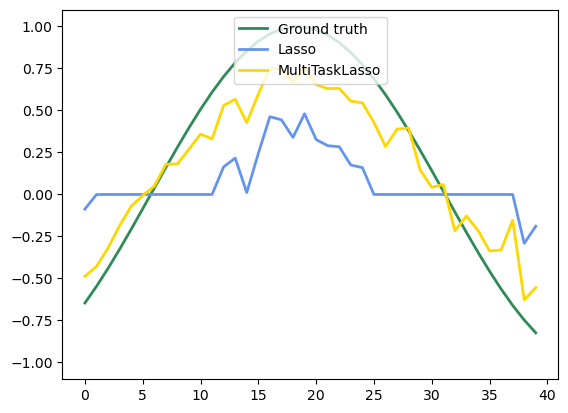

In [108]:

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()

Coefficients: 
 [ 2.03910492e+00 -3.34298743e+00  6.85163690e-01 -2.35826727e+00
 -1.89814286e-10 -3.77221854e+00  3.93088592e+00 -4.01054644e-01
  3.36919124e+00  1.65434467e-10]
Mean squared error: 0.000056
Coefficient of determination: -0.11


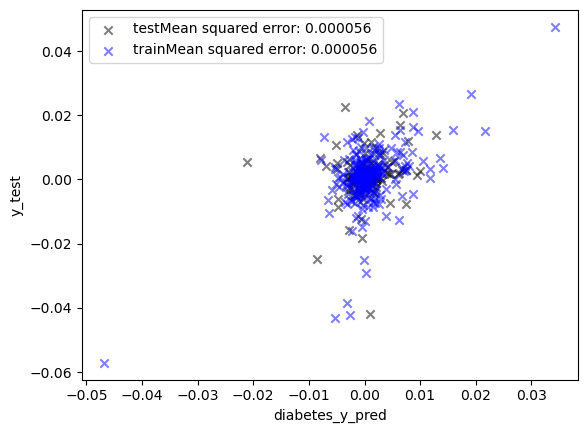

In [133]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X, diabetes_y = xdata,ydata
# Use only one feature
#diabetes_X = diabetes_X[:, np.newaxis, 2]

# # Split the data into training/testing sets
# X_train = diabetes_X[:-20]
# X_test = diabetes_X[-20:]

# # Split the targets into training/testing sets
# y_train = diabetes_y[:-20]
# y_test = diabetes_y[-20:]

X_train, X_test, y_train, y_test =  train_test_split( diabetes_X, diabetes_y, test_size=0.33, random_state=412)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.6f" % mean_squared_error(y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_y_pred))

# Plot outputs
mse="Mean squared error: %.6f" % mean_squared_error(y_test, diabetes_y_pred)
plt.scatter(diabetes_y_pred, y_test, color="black",label="test"+mse,alpha=0.5,marker="x")
mse="Mean squared error: %.6f" % mean_squared_error(regr.predict(X_train), y_train)
plt.scatter(regr.predict(X_train), y_train, color="blue",label="train"+mse,alpha=0.5,marker="x")
plt.xlabel("diabetes_y_pred")
plt.ylabel("y_test")
plt.legend()
plt.show()